In [1]:
# 2(a)

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define a function to compute the j-th Lagrange basis polynomial
def lagrange_basis(x, x_nodes, j):
    """
    Compute the j-th Lagrange basis polynomial for the given nodes at point x.
    """
    # List comprehension to create the product for the Lagrange basis polynomial
    # Exclude the term where m equals j
    basis = [(x - x_nodes[m]) / (x_nodes[j] - x_nodes[m]) for m in range(len(x_nodes)) if m != j]
    
    # Return the product of the elements in the basis list
    return np.prod(basis)

# Define a function to compute the Lebesgue function L_n(x)
def lebesgue_function(x, x_nodes):
    """
    Compute the Lebesgue function L_n(x) for the given nodes at point x.
    """
    # Use a list comprehension to sum over the absolute values of the Lagrange basis polynomials
    L_n_x = sum([abs(lagrange_basis(x, x_nodes, j)) for j in range(len(x_nodes))])
    
    # Return the computed Lebesgue function
    return L_n_x

Λ_4 = 2.2078240105629434
Λ_10 = 29.897758816015603
Λ_20 = 10978.795044663122


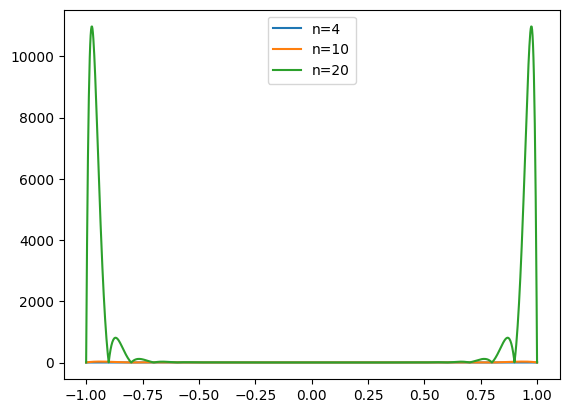

In [2]:
# 2(b)
# Define a function to plot the Lebesgue function and compute the Lebesgue constant
def plot_and_compute_lebesgue(n_values, x_generator, resolution=1000):
    """
    Evaluate and plot the Lebesgue function for a given set of n values and node generator.
    Also computes the Lebesgue constant for each n.
    """
    # Create an array of x-values for plotting
    x_plot = np.linspace(-1, 1, resolution)
    
    # Loop over the provided n values
    for n in n_values:
        # Generate the x nodes using the provided generator function
        x_nodes = x_generator(n)
        
        # Vectorize the lebesgue_function so it can operate on arrays
        L_n = np.vectorize(lambda x: lebesgue_function(x, x_nodes))
        
        # Compute the Lebesgue function values at the plot points
        L_n_values = L_n(x_plot)
        
        # Plot the Lebesgue function
        plt.plot(x_plot, L_n_values, label=f'n={n}')
        
        # Compute and print the Lebesgue constant
        print(f'Λ_{n} = {np.max(L_n_values)}')

    # Add a legend to the plot
    plt.legend()
    
    # Display the plot
    plt.show()

# Define a function to generate equidistributed nodes
def equidistributed_nodes(n):
    """
    Generate equidistributed nodes.
    """
    return np.linspace(-1, 1, n+1)

# Plot the Lebesgue function and compute the Lebesgue constant for equidistributed nodes
plot_and_compute_lebesgue([4, 10, 20], equidistributed_nodes)

Λ_4 = 1.7987562863169286
Λ_10 = 2.4209123719623764
Λ_20 = 2.867656286328133


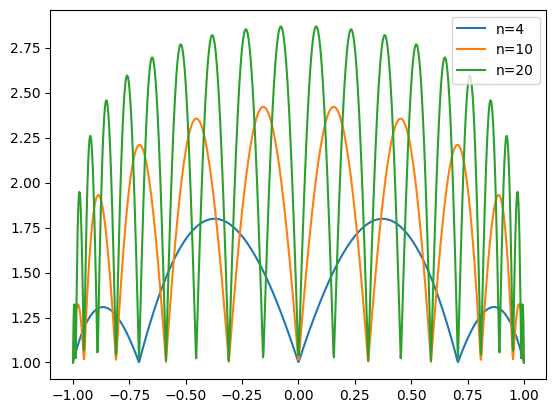

In [3]:
# 2(c)
# Define a function to generate Chebyshev nodes
def chebyshev_nodes(n):
    """
    Generate Chebyshev nodes.
    """
    return np.cos(np.linspace(0, np.pi, n+1))

# Plot the Lebesgue function and compute the Lebesgue constant for Chebyshev nodes
plot_and_compute_lebesgue([4, 10, 20], chebyshev_nodes)

In [4]:
# Q3(a)
# Import necessary libraries.
import numpy as np

# Function to compute the barycentric weights
def barycentric_weights(x_nodes):
    """
    Compute the barycentric weights for the given nodes.
    """
    n = len(x_nodes)  # Number of nodes
    λ = np.ones(n)  # Initialize weights as 1

    # Calculate weights
    for j in range(n):
        for m in range(n):
            if m != j:  # Skip when m equals j
                λ[j] /= (x_nodes[j] - x_nodes[m])  # Update weights

    return λ

# Function to evaluate the interpolating polynomial using the barycentric formula
def interpolate(x, x_nodes, f_nodes, λ):
    """
    Evaluate the interpolating polynomial at point x using the barycentric formula.
    """
    diff = x - x_nodes  # Calculate difference between x and each node

    # Check if x equals any of the nodes
    if np.any(diff == 0):
        return f_nodes[diff == 0][0]  # Return the corresponding f value

    # Calculate the numerator and denominator of the barycentric formula
    num = np.sum(λ / diff * f_nodes)
    den = np.sum(λ / diff)

    return num / den  # Return the interpolated value

In [5]:
# Q3(b)
# Given data
x_nodes = np.array([0.00, 0.25, 0.52, 0.74, 1.28, 1.50])
f_nodes = np.array([0.0000, 0.7070, 1.0000, 0.7071, -0.7074, -1.0000])

# Compute barycentric weights
λ = barycentric_weights(x_nodes)

# Use the barycentric formula to approximate f(2)
p_5_2 = interpolate(2, x_nodes, f_nodes, λ)
print(f'p_5(2) = {p_5_2}')

p_5(2) = -2.34382960817292


Coefficients for x(t) cubic spline:
Interval 0: [ 1.05369369e-02 -5.38631639e-16 -9.74898095e-01  1.50000000e+00]
Interval 1: [ 0.10210253  0.01953548 -0.96282517  0.9       ]
Interval 2: [ 0.98716733  0.11663499 -0.91965913  0.6       ]
Interval 3: [-1.77354871  1.06431562 -0.54175494  0.35      ]
Interval 4: [ 5.39456796 -0.96285056 -0.50309674  0.2       ]
Interval 5: [-3.39333331  3.39056579  0.14995865  0.1       ]
Interval 6: [ 0.670643   -0.80359419  1.21579095  0.5       ]
Interval 7: [-0.14744175  0.2224896   0.91942761  1.        ]
Coefficients for y(t) cubic spline:
Interval 0: [0.2769437 0.        0.136947  0.75     ]
Interval 1: [-3.00101226  0.51345362  0.45426134  0.9       ]
Interval 2: [ 2.43045042 -2.34050904 -0.12491523  1.        ]
Interval 3: [-0.2731872  -0.00727664 -0.87620665  0.8       ]
Interval 4: [ 2.17389553 -0.3195296  -1.00071982  0.45      ]
Interval 5: [-0.78439737  1.43480409 -0.70071098  0.2       ]
Interval 6: [-0.47422633  0.46528894  0.08212734  0.

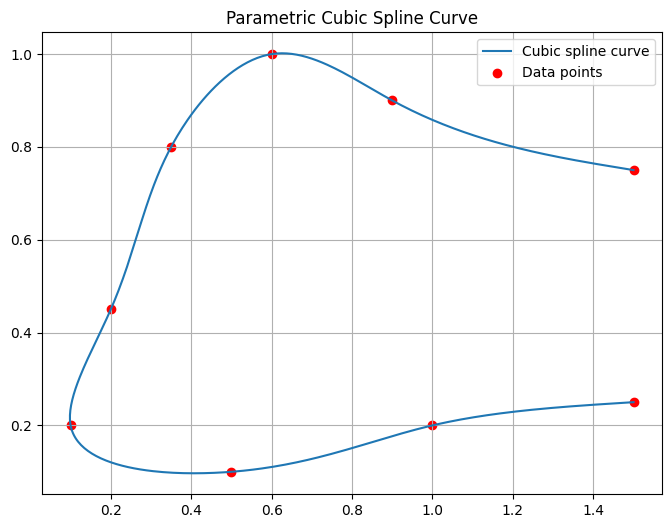

In [7]:
# Q6
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Function to compute the natural cubic spline
def compute_natural_cubic_spline(t_values, y_values):
    """
    Returns a CubicSpline object for the given data points.
    """
    return CubicSpline(t_values, y_values, bc_type='natural')

# Provided data
t_data = np.array([0, 0.618, 0.935, 1.255, 1.636, 1.905, 2.317, 2.827, 3.330])
x_data = np.array([1.50, 0.90, 0.60, 0.35, 0.20, 0.10, 0.50, 1.00, 1.50])
y_data = np.array([0.75, 0.90, 1.00, 0.80, 0.45, 0.20, 0.10, 0.20, 0.25])

# Compute cubic splines
spline_x = compute_natural_cubic_spline(t_data, x_data)
spline_y = compute_natural_cubic_spline(t_data, y_data)

# Print coefficients of the splines in a more structured way
print("Coefficients for x(t) cubic spline:")
for i, coeffs in enumerate(spline_x.c.T):
    print(f'Interval {i}: {coeffs}')

print("Coefficients for y(t) cubic spline:")
for i, coeffs in enumerate(spline_y.c.T):
    print(f'Interval {i}: {coeffs}')

# Generate a range of t values for plotting
t_plot = np.linspace(t_data.min(), t_data.max(), 500)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(spline_x(t_plot), spline_y(t_plot), label='Cubic spline curve')

# Plot the original data points
plt.scatter(x_data, y_data, color='red', label='Data points')

# Add legend and display the plot
plt.legend()
plt.grid(True)
plt.title('Parametric Cubic Spline Curve')
plt.show()